In [1]:
import io
from google.colab import files
uploaded = files.upload()

Saving MFG10YearTerminationData.csv to MFG10YearTerminationData.csv


In [2]:
import pandas as pd
df = pd.read_csv(io.BytesIO(uploaded['MFG10YearTerminationData.csv']))

In [ ]:
df.shape

(49653, 18)

In [ ]:
df.columns

Index(['EmployeeID', 'recorddate_key', 'birthdate_key', 'orighiredate_key',
       'terminationdate_key', 'age', 'length_of_service', 'city_name',
       'department_name', 'job_title', 'store_name', 'gender_short',
       'gender_full', 'termreason_desc', 'termtype_desc', 'STATUS_YEAR',
       'STATUS', 'BUSINESS_UNIT'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49653 entries, 0 to 49652
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   EmployeeID           49653 non-null  int64 
 1   recorddate_key       49653 non-null  object
 2   birthdate_key        49653 non-null  object
 3   orighiredate_key     49653 non-null  object
 4   terminationdate_key  49653 non-null  object
 5   age                  49653 non-null  int64 
 6   length_of_service    49653 non-null  int64 
 7   city_name            49653 non-null  object
 8   department_name      49653 non-null  object
 9   job_title            49653 non-null  object
 10  store_name           49653 non-null  int64 
 11  gender_short         49653 non-null  object
 12  gender_full          49653 non-null  object
 13  termreason_desc      49653 non-null  object
 14  termtype_desc        49653 non-null  object
 15  STATUS_YEAR          49653 non-null  int64 
 16  STAT

In [ ]:
print(df.isna().sum())

EmployeeID             0
recorddate_key         0
birthdate_key          0
orighiredate_key       0
terminationdate_key    0
age                    0
length_of_service      0
city_name              0
department_name        0
job_title              0
store_name             0
gender_short           0
gender_full            0
termreason_desc        0
termtype_desc          0
STATUS_YEAR            0
STATUS                 0
BUSINESS_UNIT          0
dtype: int64


In [ ]:
df.head()

,EmployeeID,recorddate_key,birthdate_key,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,gender_full,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT
0,1318,12/31/2006 0:00,1/3/1954,8/28/1989,1/1/1900,52,17,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2006,ACTIVE,HEADOFFICE
1,1318,12/31/2007 0:00,1/3/1954,8/28/1989,1/1/1900,53,18,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2007,ACTIVE,HEADOFFICE
2,1318,12/31/2008 0:00,1/3/1954,8/28/1989,1/1/1900,54,19,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2008,ACTIVE,HEADOFFICE
3,1318,12/31/2009 0:00,1/3/1954,8/28/1989,1/1/1900,55,20,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2009,ACTIVE,HEADOFFICE
4,1318,12/31/2010 0:00,1/3/1954,8/28/1989,1/1/1900,56,21,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2010,ACTIVE,HEADOFFICE


# Data Analytics)
1- Job distribution over the years?


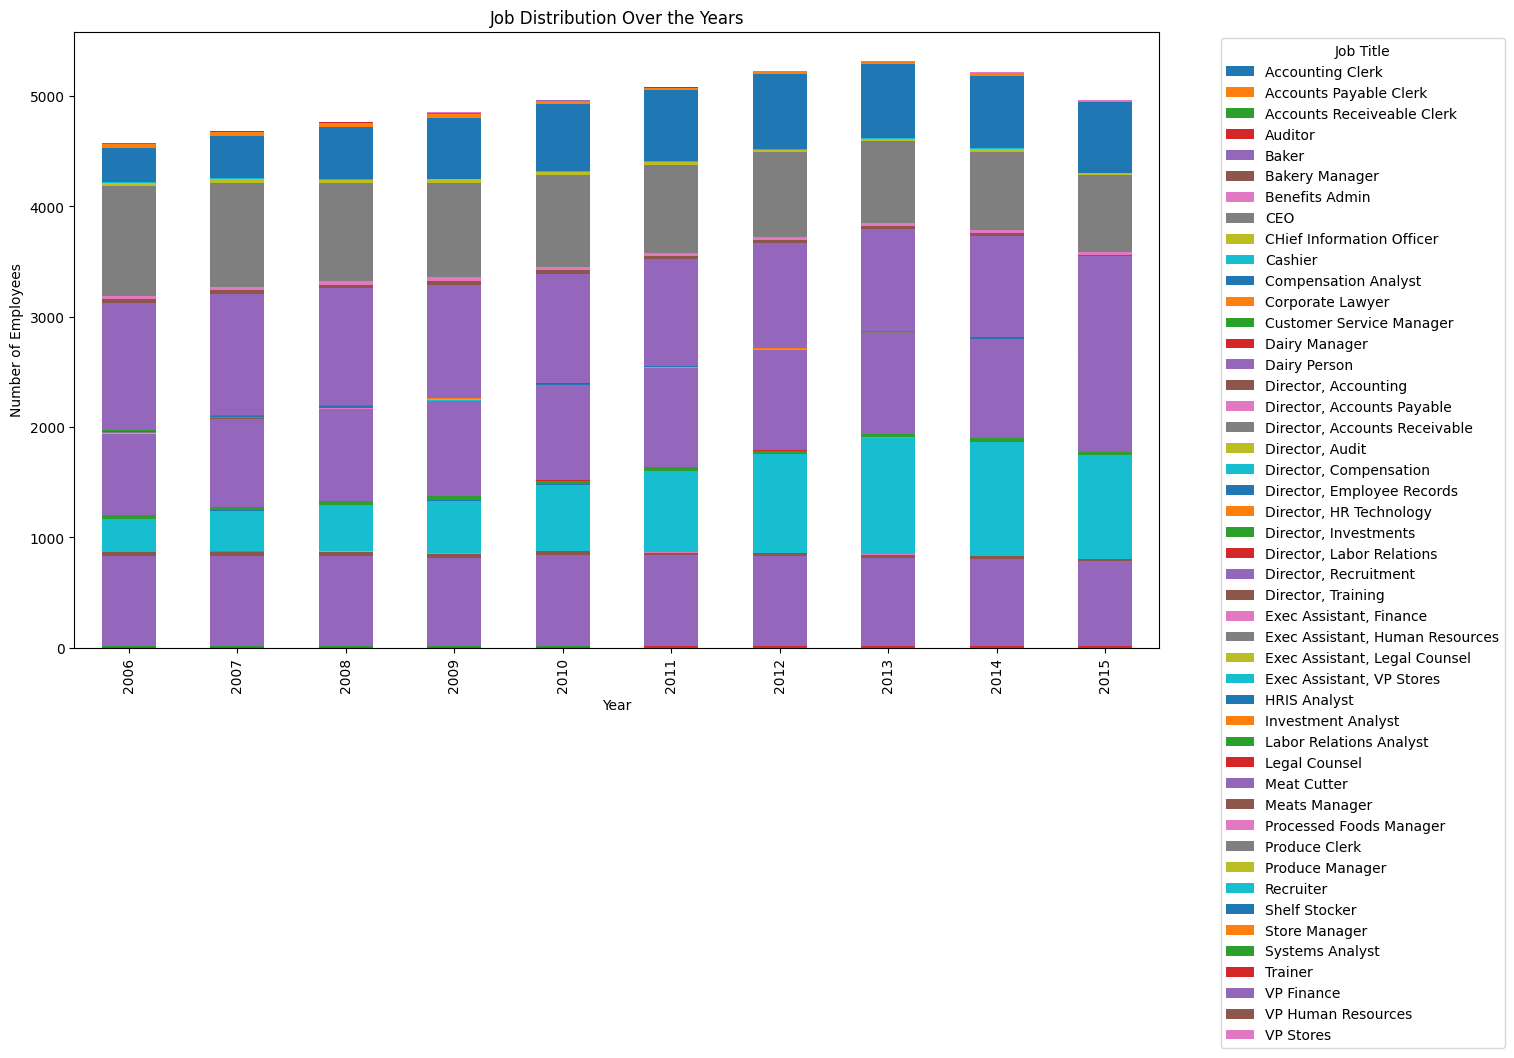

In [ ]:
job_distribution = df.groupby(['STATUS_YEAR', 'job_title']).size().unstack().fillna(0)

import matplotlib.pyplot as plt
import seaborn as sns

job_distribution.plot(kind = 'bar', stacked = True, figsize = (14, 8))
plt.title('Job Distribution Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Employees')
plt.legend(title = 'Job Title', bbox_to_anchor = (1.05, 1), loc = 'upper left')
plt.show()


2- Department distributions over the years:

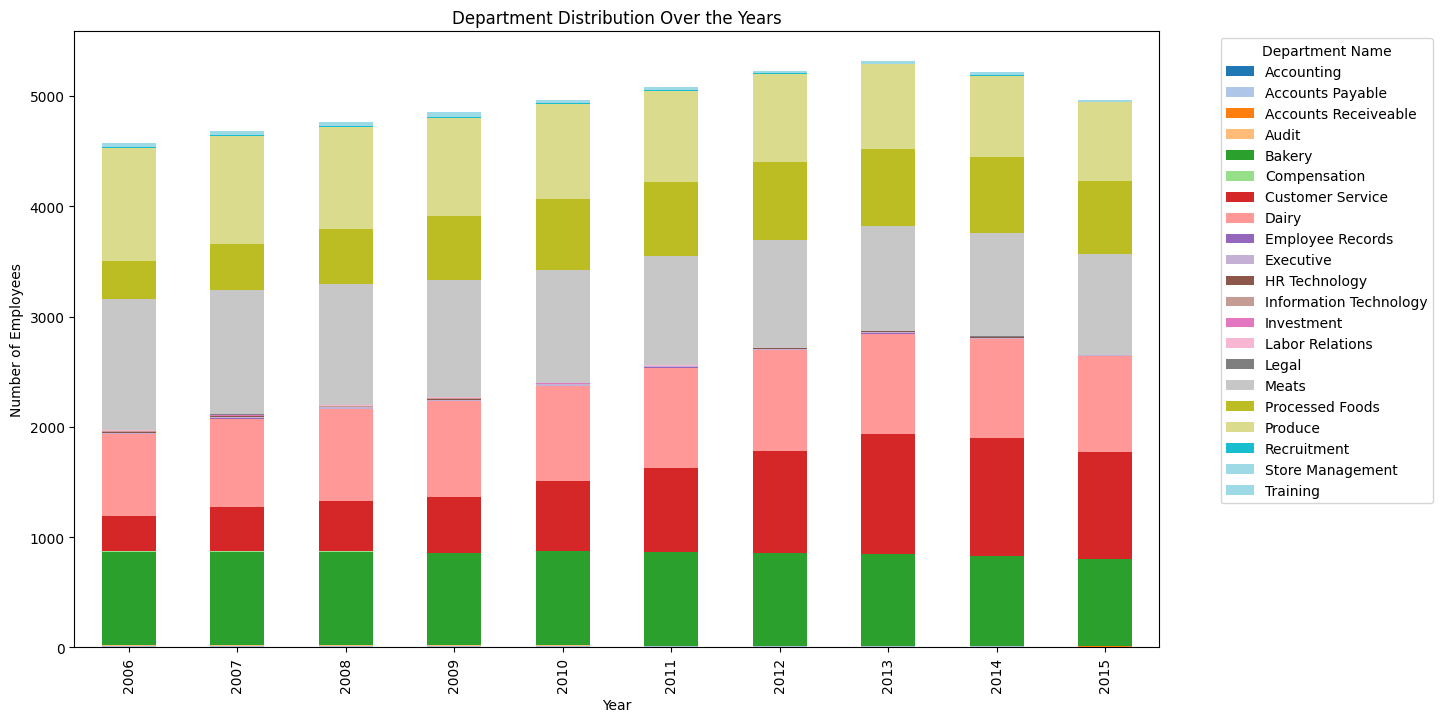

In [ ]:
department_distribution = df.groupby(['STATUS_YEAR', 'department_name']).size().unstack().fillna(0)

department_distribution.plot(kind = 'bar', stacked = True, figsize = (14, 8), colormap = 'tab20')
plt.title('Department Distribution Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Employees')
plt.legend(title = 'Department Name', bbox_to_anchor = (1.05, 1), loc = 'upper left')
plt.show()


3- Hiring over the years:

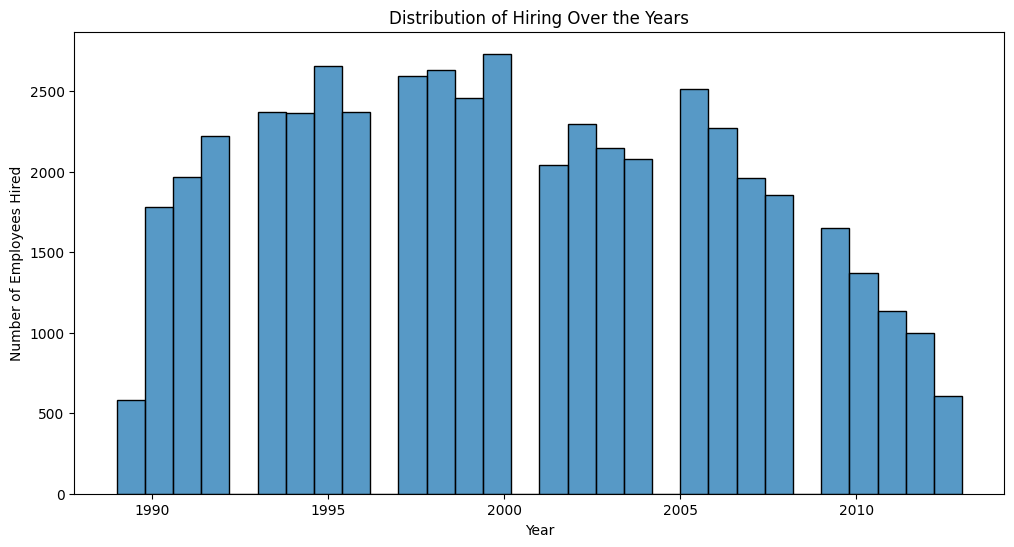

In [ ]:
df['orighiredate_key'] = pd.to_datetime(df['orighiredate_key'])
df['hire_year'] = df['orighiredate_key'].dt.year

# Histogram Plot:
plt.figure(figsize = (12, 6))
sns.histplot(df['hire_year'], bins = 30, kde = False)

plt.title('Distribution of Hiring Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Employees Hired')
plt.show()


3- Terminations over the years:

termination_year
1900    42450
2006      134
2007      325
2008      485
2009      555
2010      592
2011      502
2012      726
2013      715
2014     1698
2015     1471
dtype: int64


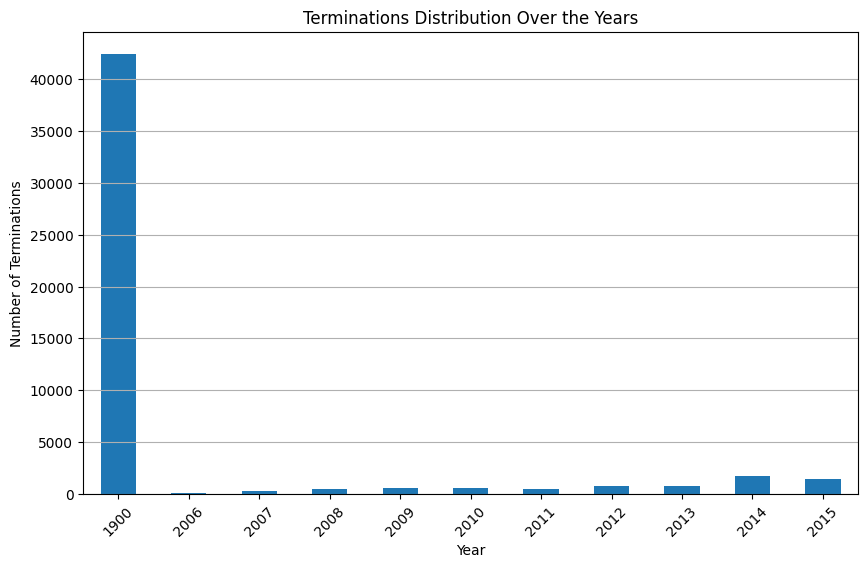

In [ ]:
# Convert terminationdate_key to datetime
df['terminationdate_key'] = pd.to_datetime(df['terminationdate_key'], errors = 'coerce')

# Extract year from terminationdate_key
df['termination_year'] = df['terminationdate_key'].dt.year

# Filter rows where termination_year is not NaN
terminated_df = df[df['termination_year'].notna()]

# Count terminations by year
termination_distribution = terminated_df.groupby('termination_year').size()

# Display the result
print(termination_distribution)

# Plotting the termination distribution
plt.figure(figsize = (10, 6))
termination_distribution.plot(kind = 'bar')
plt.title('Terminations Distribution Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Terminations')
plt.xticks(rotation = 45)
plt.grid(axis = 'y')
plt.show()


4- Do termination reasons correlate with - for example - age, department, job title or length of service?

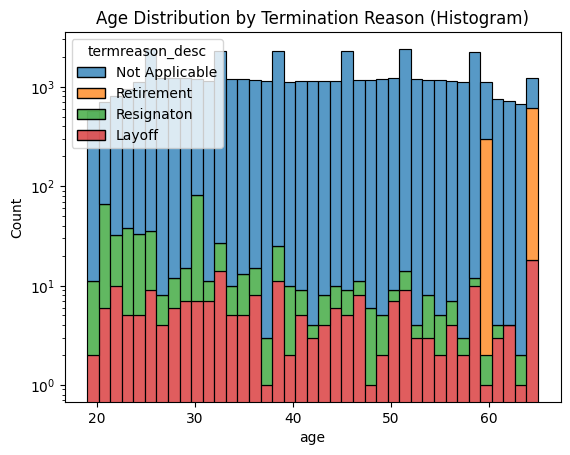

In [ ]:
sns.histplot(data = df, x = 'age', hue = 'termreason_desc', multiple = 'stack')
plt.title('Age Distribution by Termination Reason (Histogram)')
plt.yscale('log')
plt.show()

5- Example for length of service and termination reason

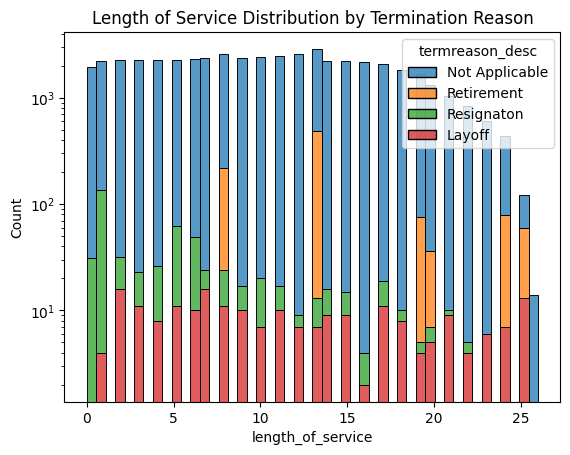

In [ ]:
sns.histplot(data = df, x = 'length_of_service', hue = 'termreason_desc', multiple = 'stack')
plt.title('Length of Service Distribution by Termination Reason')
plt.yscale('log')
plt.show()

Bar plot for categorical variables:

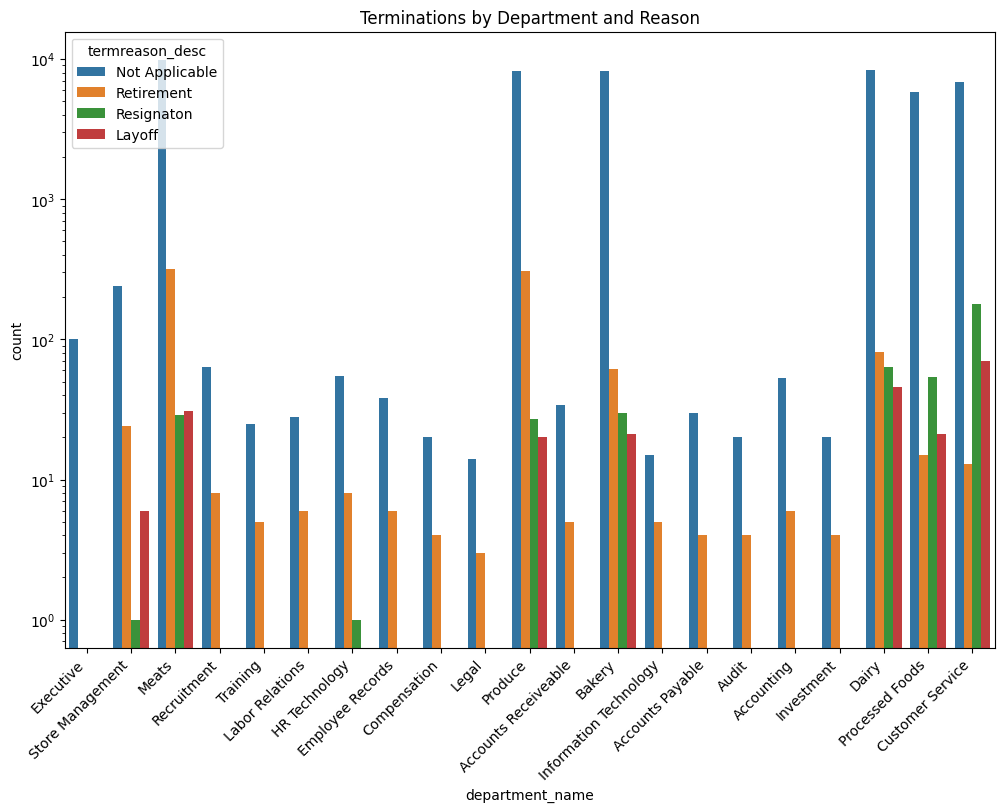

In [ ]:
plt.figure(figsize = (12, 8))
sns.countplot(x = 'department_name', hue = 'termreason_desc', data = df)
plt.xticks(rotation = 45)
plt.title('Terminations by Department and Reason')
plt.xticks(rotation = 45, ha = 'right')
plt.yscale('log')
plt.show()

6- Demographical distributions over the years:
A) Age

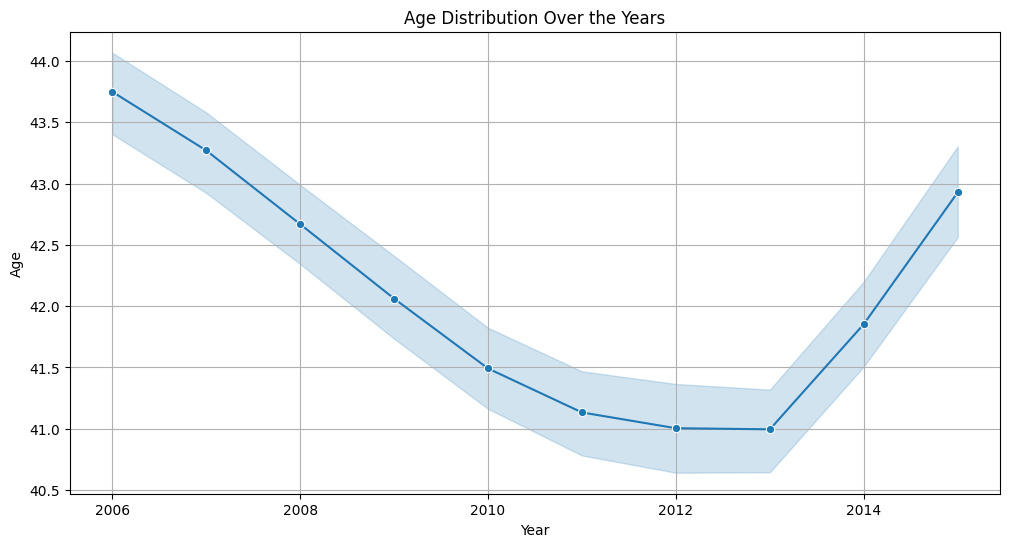

In [ ]:
plt.figure(figsize = (12, 6))
sns.lineplot(data = df, x = 'STATUS_YEAR', y = 'age', marker = 'o')
plt.title('Age Distribution Over the Years')
plt.xlabel('Year')
plt.ylabel('Age')
plt.grid(True)
plt.show()

Demographical distributions over the years: B) Gender

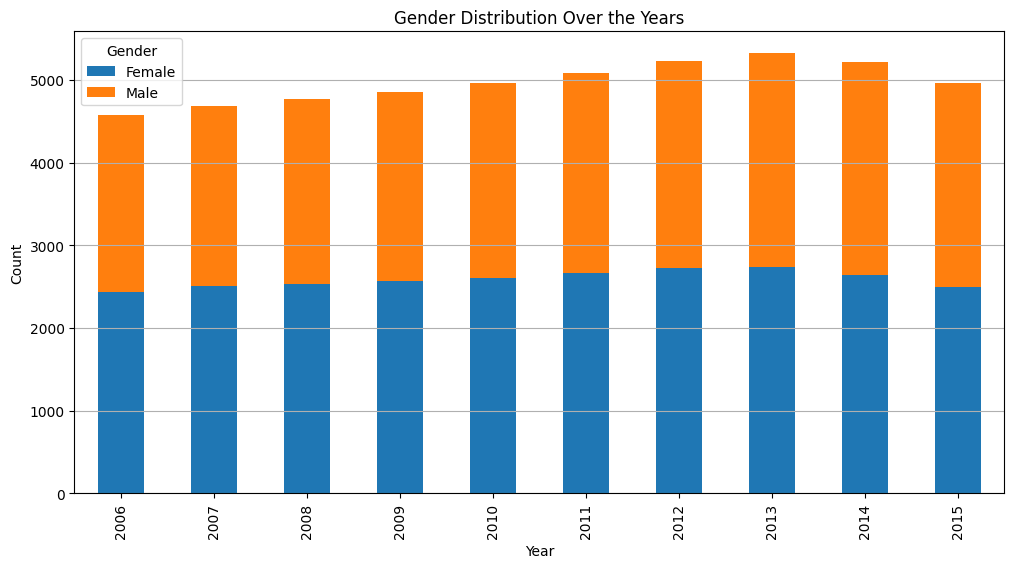

In [ ]:
gender_distribution = df.groupby(['STATUS_YEAR', 'gender_full']).size().unstack().fillna(0)
gender_distribution.plot(kind = 'bar', stacked = True, figsize = (12, 6))
plt.title('Gender Distribution Over the Years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title = 'Gender')
plt.grid(axis = 'y')
plt.show()

# Data Science)
1- Cluster employees: Use age, length of service, department & job title for the year 2015. Repeat this for other years. Is the same person in the same cluster each year or do they "switch"?

In [3]:
!pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 2.0 MB/s eta 0:00:00


# Encoding job_title Column:

In [ ]:
from category_encoders import LeaveOneOutEncoder
loo_encoder = LeaveOneOutEncoder(cols = ['job_title'], sigma = 0.1)
df['encoded_job_title'] = loo_encoder.fit_transform(df['job_title'], df['STATUS_YEAR'])

# Before doing clustering analysis, I encoded categorical columns through LeaveOneOutEncoder method because it is a required step.

# Encoding department_name Column:

In [ ]:
loo_encoder = LeaveOneOutEncoder(cols = ['department_name'], sigma = 0.1)
df['encoded_department_name'] = loo_encoder.fit_transform(df['department_name'], df['STATUS_YEAR'])

# K-Means Clustering:

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# List of years in your dataset
years = df['STATUS_YEAR'].unique()

# Dictionary to store clustering results for each year
cluster_results = {}

# Perform clustering for each year
for year in years:
    df_year = df[df['STATUS_YEAR'] == year]

    # Extract features and scale
    features_year = df_year[['age', 'length_of_service', 'encoded_department_name', 'encoded_job_title']]
    scaler = StandardScaler()
    features_year_scaled = scaler.fit_transform(features_year)

    # Perform K-Means clustering
    kmeans = KMeans(n_clusters = 4, random_state = 42)
    df_year['kmeans_cluster'] = kmeans.fit_predict(features_year_scaled)

    # Store clustering results
    cluster_results[year] = df_year[['EmployeeID', 'kmeans_cluster']]

# Display cluster results for each year
for year, results in cluster_results.items():
    print(f"Clustering results for {year}:")
    print(results)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
<ipython-input-9-55dd2dd3243b>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_year['kmeans_cluster'] = kmeans.fit_predict(features_year_scaled)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
<ipython-input-9-55dd2dd3243b>:25: SettingWithCopyWarning: 
A 

Clustering results for 2006:
       EmployeeID  kmeans_cluster
0            1318               2
10           1319               2
20           1320               1
30           1321               2
40           1322               1
...           ...             ...
49216        5416               3
49234        5604               0
49269        6092               3
49286        6312               3
49310        6540               0

[4579 rows x 2 columns]
Clustering results for 2007:
       EmployeeID  kmeans_cluster
1            1318               1
11           1319               0
21           1320               0
31           1321               1
41           1322               0
...           ...             ...
49308        6525               3
49311        6561               3
49312        6567               2
49313        6568               3
49318        6616               3

[4683 rows x 2 columns]
Clustering results for 2008:
       EmployeeID  kmeans_cluster
2            

<ipython-input-9-55dd2dd3243b>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_year['kmeans_cluster'] = kmeans.fit_predict(features_year_scaled)


# Choosing Optimal n_clusters Through Elbow Method:

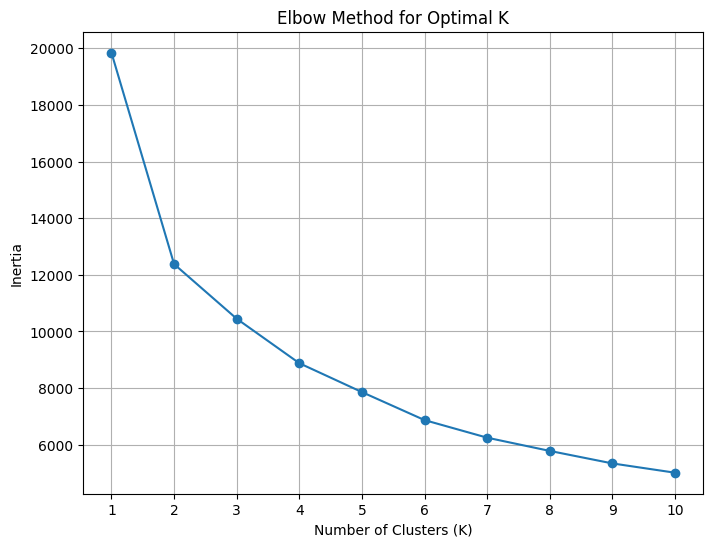

In [ ]:
# Range of K values
import matplotlib.pyplot as plt
k_range = range(1, 11)

# List to store inertia values
inertia_values = []

# Run K-Means for each K value and compute inertia
for k in k_range:
    kmeans = KMeans(n_clusters = k, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(features_year_scaled)
    inertia_values.append(kmeans.inertia_)

# Plot Inertia vs. K
plt.figure(figsize = (8, 6))
plt.plot(k_range, inertia_values, marker = 'o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.xticks(k_range)
plt.grid(True)
plt.savefig('elbow_method.png') # Save the plot as a PNG file
plt.show()

# The elbow point appears around K = 3. This suggests that using 3 clusters might be optimal for balancing the reduction in inertia with the simplicity of the model.


In [ ]:
# K-Means with 3 n_clusters:

years = df['STATUS_YEAR'].unique()

# Dictionary to store clustering results for each year
cluster_results = {}

# Perform clustering for each year
for year in years:
    df_year = df[df['STATUS_YEAR'] == year]

    # Extract features and scale
    features_year = df_year[['age', 'length_of_service', 'encoded_department_name', 'encoded_job_title']]
    scaler = StandardScaler()
    features_year_scaled = scaler.fit_transform(features_year)

    # Perform K-Means clustering
    kmeans = KMeans(n_clusters = 3, random_state = 42)
    df_year['kmeans_cluster'] = kmeans.fit_predict(features_year_scaled)

    # Store clustering results
    cluster_results[year] = df_year[['EmployeeID', 'kmeans_cluster']]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
<ipython-input-11-2057e2c9f860>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_year['kmeans_cluster'] = kmeans.fit_predict(features_year_scaled)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
<ipython-input-11-2057e2c9f860>:19: SettingWithCopyWarning: 


In [ ]:
merged_results = pd.DataFrame()

# Merge results for each year
for year, results in cluster_results.items():
    if merged_results.empty:
        merged_results = results.rename(columns = {'kmeans_cluster': f'cluster_{year}'})
    else:
        merged_results = pd.merge(merged_results, results.rename(columns = {'kmeans_cluster': f'cluster_{year}'}),
                                  on = 'EmployeeID', how = 'outer')

# Display merged results
print("Merged Clustering Results Across Years:")
print(merged_results)

Merged Clustering Results Across Years:
      EmployeeID  cluster_2006  cluster_2007  cluster_2008  cluster_2009  \
0           1318           2.0           1.0           1.0           0.0   
1           1319           2.0           2.0           1.0           0.0   
2           1320           0.0           2.0           1.0           2.0   
3           1321           2.0           1.0           2.0           0.0   
4           1322           0.0           2.0           1.0           2.0   
...          ...           ...           ...           ...           ...   
6284        8336           NaN           NaN           NaN           NaN   
6285        8181           NaN           NaN           NaN           NaN   
6286        8223           NaN           NaN           NaN           NaN   
6287        8226           NaN           NaN           NaN           NaN   
6288        8264           NaN           NaN           NaN           NaN   

      cluster_2010  cluster_2011  cluster_2012 

In [ ]:
# Loop through each pair of consecutive years:

for i in range(len(years) - 1):
    year1 = years[i]
    year2 = years[i + 1]

    # Filter employees with data for both years
    data = merged_results[[f'cluster_{year1}', f'cluster_{year2}']].dropna()

    # Count how many employees switched clusters
    data['switched'] = data[f'cluster_{year1}'] != data[f'cluster_{year2}']
    switch_count = data['switched'].sum()

    print(f"Number of employees switching clusters from {year1} to {year2}: {switch_count}")


Number of employees switching clusters from 2006 to 2007: 3754
Number of employees switching clusters from 2007 to 2008: 1515
Number of employees switching clusters from 2008 to 2009: 3886
Number of employees switching clusters from 2009 to 2010: 2507
Number of employees switching clusters from 2010 to 2011: 2666
Number of employees switching clusters from 2011 to 2012: 1604
Number of employees switching clusters from 2012 to 2013: 2604
Number of employees switching clusters from 2013 to 2014: 2801
Number of employees switching clusters from 2014 to 2015: 4221


2- Building a churn model which predicts the total employee turnover for a given year. Adapt this and try to predict, which person will probably quit their job.

This question consists of 2 parts. In the first part, we must calculate th total employee turnover for a given year. Hence, it is a regression (Continuous
variable) task. In the second part, however, the problem becomes a binary classification, thus, requires special considerations which are different from
regression problem. Now, I aim to tackle with the first part. After that, I will head over the second part.


In [4]:
# Here, I am going to compute the total number of employee turnover per year.

df['terminationdate_key'] = pd.to_datetime(df['terminationdate_key'], format='%m/%d/%Y', errors = 'coerce')

# Extract year from termination date:
df['termination_year'] = df['terminationdate_key'].dt.year

# Calculate the total number of terminations per year.
turnover_by_year = df.groupby('termination_year').apply(lambda x: (x['STATUS'] == 'TERMINATED').sum()).reset_index(name = 'total_turnover')

# Add previous year's turnover for historical context
turnover_by_year['historical_turnover'] = turnover_by_year['total_turnover'].shift(1).fillna(turnover_by_year['total_turnover'].mean())

# Ensure that termination_year is numberic
turnover_by_year['termination_year'] = turnover_by_year['termination_year'].astype(int)


In [5]:
# Merge:

# In this step, I am going to merge 2 DataFrames, namely df and turnover_by_year.
df = df.merge(turnover_by_year[['termination_year', 'total_turnover', 'historical_turnover']], left_on = 'termination_year', right_on = 'termination_year', how = 'left')


In [6]:
df_one = df.copy()

# Skewness:

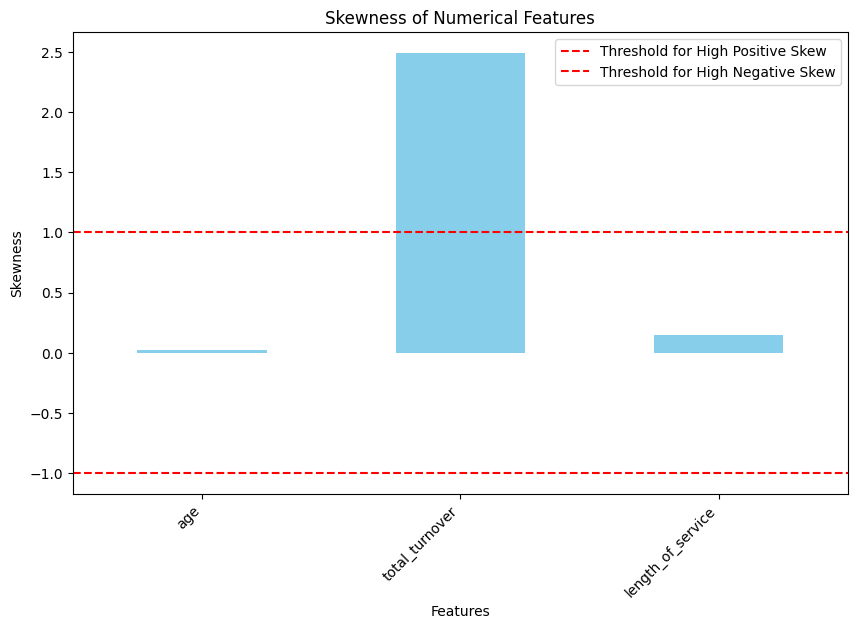

In [24]:
numerical_columns = ['age', 'total_turnover', 'length_of_service']

skewness = df_three[numerical_columns].skew()

plt.figure(figsize = (10, 6))
skewness.plot(kind = 'bar', color = 'skyblue')
plt.axhline(y = 1, color = 'r', linestyle = '--', label = 'Threshold for High Positive Skew')
plt.axhline(y = -1, color = 'r', linestyle = '--', label = 'Threshold for High Negative Skew')
plt.title('Skewness of Numerical Features')
plt.xlabel('Features')
plt.ylabel('Skewness')
plt.xticks(rotation = 45, ha = 'right')
plt.legend()
plt.show()

# Fixing Skewness:

In [27]:
import numpy as np
df['total_turnover_log'] = np.log1p(df['total_turnover'])

In [28]:
# Defining feature matrix & y vector:

X = df['termination_year'].values.reshape(-1, 1)
y = df['total_turnover_log']

# In the first place, I am going to apply a simple linear regression model. It is considered a baseline model and the feature matrix "X" has only one column.

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Linear Regression

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(X_train, y_train)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# MSE:
print(f"Mean Squared Error: {mean_squared_error(y_train, y_pred_train)}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred_test)}")

# Since the difference between MSE of training set & test set is negligable it shows that the model did not overfit.


Mean Squared Error: 0.010925508788545236
Mean Squared Error: 0.010978486943817


In [32]:
# RMSE:

import numpy as np
mse = 0.010925508788545236
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")

Root Mean Squared Error: 0.10452515863917757


In [10]:
df_three = df.copy()

# Encoding city_name Column:

In [11]:
from category_encoders import LeaveOneOutEncoder
sigma_value = 1.0
encoder = LeaveOneOutEncoder(sigma = sigma_value)

# Apply the encoder to encode the 'city_name' column
df_encoded = encoder.fit_transform(df_three[['city_name']], df_three['total_turnover'])

# Replace the original 'city_name' column with the encoded values
df_three['city_name_encoded'] = df_encoded

# Encoding department_name Column:

In [12]:
sigma_value = 1.0
encoder = LeaveOneOutEncoder(sigma = sigma_value)

# Apply the encoder to encode the 'city_name' column
df_encoded_one = encoder.fit_transform(df_three[['department_name']], df_three['total_turnover'])

# Replace the original 'city_name' column with the encoded values
df_three['department_name_encoded'] = df_encoded_one

# Encoding job_title Column:

In [13]:
sigma_value = 1.0
encoder = LeaveOneOutEncoder(sigma = sigma_value)

# Apply the encoder to encode the 'city_name' column
df_encoded_two = encoder.fit_transform(df_three[['job_title']], df_three['total_turnover'])

# Replace the original 'city_name' column with the encoded values
df_three['job_title_encoded'] = df_encoded_two

# Encoding gender_full Column:

In [14]:
df_three['gender_full_encoded'] = df_three['gender_full'].replace({'Female': 0, 'Male': 1}) # It has 2 unique values, thus, it is a binary column

# Correlation:

In [ ]:
features = ['termination_year', 'historical_turnover', 'city_name_encoded', 'department_name_encoded', 'job_title_encoded', 'gender_full_encoded', 'age', 'length_of_service']
X_one = df_three[features]
y_one = df_three['total_turnover']

# Before going further, let's analyze the relationships between independent variables and dependent variable.
correlation_matrix = X_one.copy()
correlation_matrix['total_turnover'] = y_one
correlation_matrix = correlation_matrix.corr()
print(correlation_matrix['total_turnover'])

termination_year           0.949597
historical_turnover        0.167641
city_name_encoded          0.393037
department_name_encoded    0.186566
job_title_encoded          0.239347
gender_full_encoded       -0.125711
age                        0.212150
length_of_service          0.053668
total_turnover             1.000000
Name: total_turnover, dtype: float64


# Heatmap:

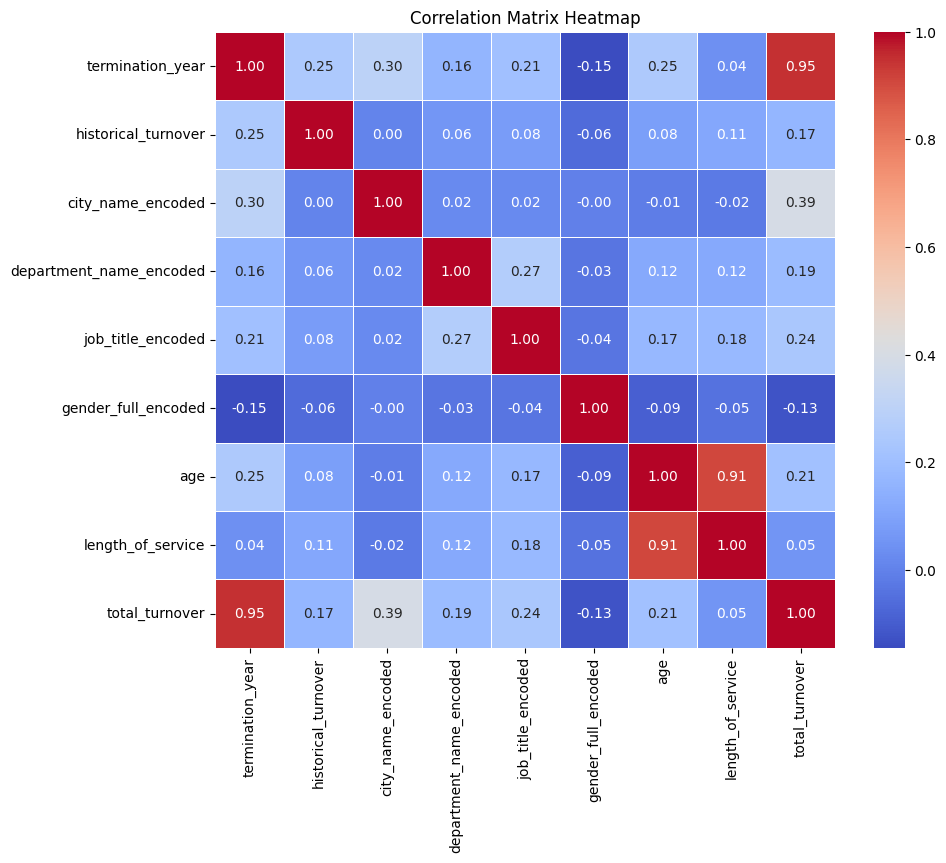

In [ ]:
plt.figure(figsize = (10, 8))
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm', fmt = '.2f', linewidths = 0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


In [16]:
features = ['termination_year', 'historical_turnover', 'city_name_encoded', 'department_name_encoded', 'job_title_encoded', 'age']
X = df_three[features]
y = df_three['total_turnover_log']

# Here, I define the feature matrix with more input features. Adding more features can increase the complexity of the model.

# Splitting

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Rescaling

In [20]:
from sklearn.preprocessing import StandardScaler
scaler_one = StandardScaler()
scaler_one.fit(X_train)
X_train_scaled = scaler_one.transform(X_train)
X_test_scaled = scaler_one.transform(X_test)

# RandomForestRegressor:

In [21]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

rfr = RandomForestRegressor(n_estimators = 200, max_depth = 10, min_samples_split = 10, min_samples_leaf = 5, max_features = 'sqrt')
rfr.fit(X_train_scaled, y_train)
y_pred = rfr.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 7.040169982302998e-05


# ExtraTreeRegressor

In [22]:
from sklearn.ensemble import ExtraTreesRegressor

etr = ExtraTreesRegressor(n_estimators = 100, random_state = 42, max_depth = 10, min_samples_split = 10, min_samples_leaf = 5, max_features = 'sqrt')
etr.fit(X_train_scaled, y_train)
y_pred = etr.predict(X_test_scaled)

# MAE)
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

# MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# RMSE)
rmse = mean_squared_error(y_test, y_pred, squared = False)
print(f"Root Mean Square Error: {rmse}")

# R2 Score)
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(f"R2 Score: {r2}")


Mean Absolute Error: 0.020493909407111658
Mean Squared Error: 0.0018200314168353774
Root Mean Square Error: 0.042661826224804036
R2 Score: 0.9994242911253997


In [ ]:
df_two = df_three.copy()

It's time to deal with the second part of the question.

In [ ]:
df_two['will_quit'] = (df_two['STATUS'] == 'TERMINATED').astype(int)


# Class Imbalance

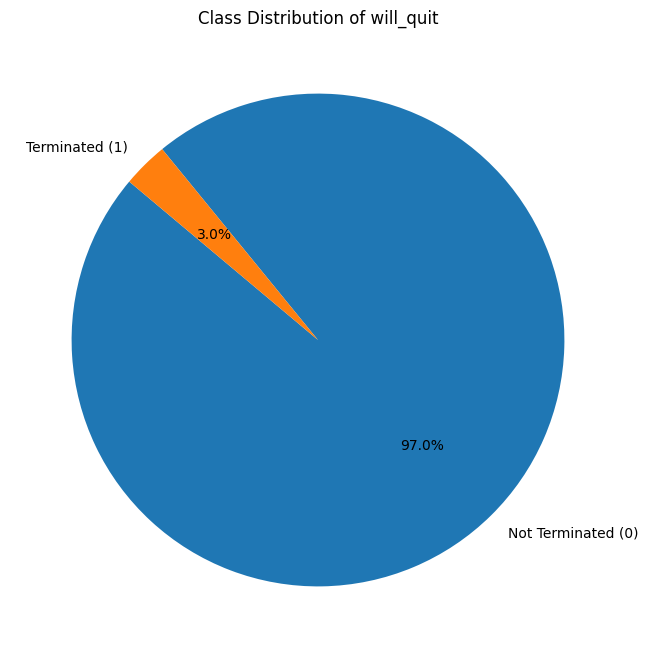

In [ ]:
# Calculate the distribution of 'will_quit'
class_counts = df_two['will_quit'].value_counts()

# Plot pie chart
plt.figure(figsize = (8, 8))
plt.pie(class_counts, labels = ['Not Terminated (0)', 'Terminated (1)'], autopct = '%1.1f%%', startangle = 140)
plt.title('Class Distribution of will_quit')
plt.show()

# There is a high class imbalance. While Not Terminated (0) occupies the most segment of the chart, Terminated (1) does not.

# Target Encoding

In [ ]:
def mean_encoding_with_smoothing(df_one, columns, target, alpha = 1.0):
    """ Encode categorical columns with mean target encoding and smoothing. """
    df_encoded = df_one.copy()
    for col in columns:
        mean_target = df_one.groupby(col)[target].mean()
        global_mean = df_one[target].mean()
        count = df_one.groupby(col).size()
        smooth_mean = (mean_target * count + global_mean * alpha) / (count + alpha)
        df_encoded[col + '_encoded'] = df_one[col].map(smooth_mean)
    return df_encoded

columns_to_encode = ['city_name', 'department_name', 'job_title']
df_encoded = mean_encoding_with_smoothing(df_two, columns_to_encode, 'will_quit', alpha = 10)


# Encoding gender_full Column

In [ ]:
df_encoded['gender_full_encoded'] = df_encoded['gender_full'].replace({'Female': 0, 'Male': 1})

In [ ]:
encoded_columns = [col + '_encoded' for col in columns_to_encode]
additional_columns = ['age', 'length_of_service', 'gender_full_encoded']
all_columns = encoded_columns + additional_columns

X_one = df_encoded[all_columns]
y_one = df_encoded['will_quit']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_one, y_one, test_size = 0.2, random_state = 42)

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled_one = scaler.transform(X_train)
X_test_scaled_one = scaler.transform(X_test)

# LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

model = LogisticRegression(
    penalty = 'l2',
    C = 1.0,
    solver = 'lbfgs',
    max_iter = 100,
    class_weight = 'balanced',
    random_state = 42
)

model.fit(X_train_scaled_one, y_train)
y_pred = model.predict(X_test_scaled_one)

print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")
print('')
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

# True Positives  (TP): 211  --> The model correctly predicted the positive class.
# True Negatives  (TN): 8553 --> The model correctly predicted the negative class.
# False Positives (FP): 1085 --> The model incorrectly predicted the positive class when it was actually negative.
# False Negatives (FN):  82  --> The model incorrectly predicted the negative class when it was actually positive.


Confusion Matrix:
[[8553 1085]
 [  82  211]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.89      0.94      9638
           1       0.16      0.72      0.27       293

    accuracy                           0.88      9931
   macro avg       0.58      0.80      0.60      9931
weighted avg       0.97      0.88      0.92      9931



# XGBoost

In [ ]:
import xgboost as xgb

# Calculate scale_pos_weight based on the training data imbalance
num_negatives = sum(y_train == 0)
num_positives = sum(y_train == 1)
scale_pos_weight = num_negatives / num_positives

model = xgb.XGBClassifier(objective = 'binary:logistic', scale_pos_weight = scale_pos_weight, learning_rate = 0.1, max_depth = 6, n_estimators = 100, subsample = 0.8, colsample_bytree = 0.8,random_state = 42)

model.fit(X_train_scaled_one, y_train)
y_pred = model.predict(X_test_scaled_one)

print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")
print('')
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")


Confusion Matrix:
[[9249  389]
 [  36  257]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98      9638
           1       0.40      0.88      0.55       293

    accuracy                           0.96      9931
   macro avg       0.70      0.92      0.76      9931
weighted avg       0.98      0.96      0.96      9931

